In [1340]:
import os
import pandas as pd
import plotly as plt

In [1341]:
WRITE_FILES = True

if not WRITE_FILES:
    print("WARNING: NOT WRITING OUTPUT FILES!!!!!!")
else:
    print("Outputs will be written to CSV files")

Outputs will be written to CSV files


In [1342]:
def write_csv(df, output_path):
    if WRITE_FILES:
        print(f'Writing to "{output_path}"')
        df.to_csv(output_path, index=False)
    else:
        print("WARNING: NOT WRITING OUTPUT FILES!!!!!!")


In [1343]:
delays_folder = '../Data/Delays/'
aircraft_folder = '../Data/Aircraft/'
airport_folder = '../Data/Airports/'
aircraft_reference_path = aircraft_folder + 'ACFTREF.csv'
aircraft_master_path = aircraft_folder + 'MASTER.csv'
airlines_path = airport_folder + 'airlines.csv'
airports_path = airport_folder + 'airports.csv'

delays_files = [f"{filename}" for filename in os.listdir(delays_folder) if os.path.isfile((os.path.join(delays_folder, filename)))]

[print(filename) for filename in delays_files];

AA-American_Airlines.csv
AS-Alaska_Airlines.csv
B6-JetBlue_Airways.csv
DH-Independence_Air.csv
DL-Delta_Airlines.csv
F9-Frontier_Airlines.csv
G4-Allegiant.csv
HA-Hawaiian Airlines.csv
MQ-American_Eagle_Airlines.csv
NK-Spirit_Airlines.csv
OO-SkyWest_Airlines.csv
QX-Horizon_Air.csv
UA-United_Airlines.csv
WN-Southwest_Airlines.csv


In [1344]:
# read aircraft data
aircraft_master_df = pd.read_csv(aircraft_master_path, dtype={'TYPE ENGINE': object, 'LAST ACTION DATE': object})
aircraft_master_df = aircraft_master_df.rename({'MFR MDL CODE': 'CODE', 'N-NUMBER': 'Tail Number'}, axis=1)

# drop columns we know we don't need
aircraft_master_df = aircraft_master_df.drop(['SERIAL NUMBER', 'CERTIFICATION', 'TYPE AIRCRAFT',
                                              'TYPE REGISTRANT', 'NAME', 'STREET', 'STREET2', 'CITY', 'STATE', 'ZIP CODE', 'REGION', 'COUNTY', 'COUNTRY', 
                                              'OTHER NAMES(1)', 'OTHER NAMES(2)', 'OTHER NAMES(3)', 'OTHER NAMES(4)','OTHER NAMES(5)',
                                              'STATUS CODE', 'MODE S CODE', 
                                              'FRACT OWNER', 'KIT MFR', ' KIT MODEL', 'MODE S CODE HEX', 'UNIQUE ID', 
                                              'Unnamed: 34'], axis=1)
print(aircraft_master_df.columns)
print(aircraft_master_df.head())
print(aircraft_master_df.size)

Index(['Tail Number', 'CODE', 'ENG MFR MDL', 'YEAR MFR', 'LAST ACTION DATE',
       'CERT ISSUE DATE', 'TYPE ENGINE', 'AIR WORTH DATE', 'EXPIRATION DATE'],
      dtype='object')
  Tail Number     CODE ENG MFR MDL YEAR MFR LAST ACTION DATE CERT ISSUE DATE  \
0       100    7100510       17003     1940         20230122        20050506   
1       10000  2130004                              20240823        20240823   
2       10001  9601202       67007     1928         20230718        20190227   
3       10004  2072738                              20230722        20130312   
4       10006  1152020       17026     1955         20230421        19980826   

  TYPE ENGINE AIR WORTH DATE EXPIRATION DATE  
0          1        19540430        20270430  
1          1                        20310831  
2          1                        20290228  
3          2                        20290331  
4          1        19710909        20280229  
2706885


In [1345]:
aircraft_master_df.dtypes

Tail Number         object
CODE                object
ENG MFR MDL         object
YEAR MFR            object
LAST ACTION DATE    object
CERT ISSUE DATE     object
TYPE ENGINE         object
AIR WORTH DATE      object
EXPIRATION DATE     object
dtype: object

In [1346]:
aircraft_reference_df = pd.read_csv(aircraft_reference_path, dtype={'BUILD-CERT-IND': 'int64'})
aircraft_reference_df = aircraft_reference_df.drop(['TC-DATA-SHEET', 'TC-DATA-HOLDER',
                                                    'Unnamed: 13'], axis=1)
print(aircraft_reference_df.dtypes)
print(aircraft_reference_df.head())
print(aircraft_reference_df.size)

CODE              object
MFR               object
MODEL             object
TYPE-ACFT         object
TYPE-ENG           int64
AC-CAT             int64
BUILD-CERT-IND     int64
NO-ENG             int64
NO-SEATS           int64
AC-WEIGHT         object
SPEED              int64
dtype: object
      CODE                             MFR                 MODEL TYPE-ACFT  \
0  0020901  AAR AIRLIFT GROUP INC           UH-60A                       6   
1  0030109  EXLINE ACE-C                    ACE-C                        4   
2  003010D  DELEBAUGH                       P                            4   
3  003010H  DAL PORTO                       BABY ACE D                   4   
4  003010P  DUNN                            BABY ACE                     4   

   TYPE-ENG  AC-CAT  BUILD-CERT-IND  NO-ENG  NO-SEATS AC-WEIGHT  SPEED  
0         3       1               0       2        15   CLASS 3      0  
1         1       1               1       1         1   CLASS 1     82  
2         1       1    

In [1347]:
aircraft_df = aircraft_master_df.merge(aircraft_reference_df, how='left', on='CODE')
aircraft_df.head()

,Tail Number,CODE,ENG MFR MDL,YEAR MFR,LAST ACTION DATE,CERT ISSUE DATE,TYPE ENGINE,AIR WORTH DATE,EXPIRATION DATE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED
0,100,7100510,17003,1940,20230122,20050506,1,19540430,20270430,PIPER,J3C-65,4,1,1,0,1,2,CLASS 1,67
1,10000,2130004,,,20240823,20240823,1,,20310831,CIRRUS DESIGN CORP,SR22T,4,1,1,0,1,5,CLASS 1,0
2,10001,9601202,67007,1928,20230718,20190227,1,,20290228,WACO,ASO,4,1,1,0,1,3,CLASS 1,79
3,10004,2072738,,,20230722,20130312,2,,20290331,CESSNA,T182T,4,2,1,0,1,4,CLASS 1,0
4,10006,1152020,17026,1955,20230421,19980826,1,19710909,20280229,BEECH,D-45 (T-34B),4,1,1,0,1,4,CLASS 1,0


In [1348]:
# strip white space from all columns
aircraft_df = aircraft_df.iloc[:].map(lambda x: x.strip() if isinstance(x, str) else x)
aircraft_df['MFR'].unique()

array(['PIPER', 'CIRRUS DESIGN CORP', 'WACO', ..., 'SHAY GREGORIE',
       'ATEC', 'HARRELSON SUSAN E'], dtype=object)

In [1349]:
# re-code tail numbers for consistency with delays file
aircraft_df['Tail Number'] = 'N' + aircraft_df['Tail Number']
aircraft_df['Tail Number'].unique()

array(['N100', 'N10000', 'N10001', ..., 'N9ZT', 'N9ZU', 'N9ZX'],
      dtype=object)

In [1350]:
# function to read delays file
def read_delays_file(folder, file):
    # get airline code from filename - DON'T NEED! IT'S IN THE FILE hur dur
    # airline_code = file[0:2]
    delays_df = pd.read_csv(f'{folder}{file}')
    delays_df = delays_df.drop(['Wheels-off time', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)',
                                'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
                                'Delay Late Aircraft Arrival (Minutes)'], axis=1)
    delays_df = delays_df.rename({'Date (MM/DD/YYYY)': 'Date',
                                  'Scheduled departure time': 'Scheduled Departure Time',
                                  'Actual departure time': 'Actual Departure Time',
                                  'Scheduled elapsed time (Minutes)': 'Scheduled Elapsed Time',
                                  'Actual elapsed time (Minutes)': 'Actual Elapsed Time',
                                  'Departure delay (Minutes)': 'Departure Delay'}, axis=1)
    
    # print(delays_df.columns)
    return delays_df

In [1351]:
delays_list = [read_delays_file(delays_folder, delays_file) for delays_file in delays_files]
# delays_list[0].head()

delays_df = pd.concat(delays_list)
delays_df = delays_df.reset_index(drop=True)
print(len(delays_df))
delays_df.tail()

894689


,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time,Actual Elapsed Time,Departure Delay
894684,WN,12/31/2024,4297,N8564Z,PHX,14:25,14:47,85,75,22
894685,WN,12/31/2024,4334,N8930S,LAS,17:05,17:07,70,63,2
894686,WN,12/31/2024,4427,N291WN,SFO,14:50,14:53,85,75,3
894687,WN,12/31/2024,4598,N8751R,DEN,18:20,18:15,145,125,-5
894688,WN,12/31/2024,4843,N8634A,OAK,11:20,11:30,90,72,10


In [1352]:
# Merge with aircraft data
delays_df = delays_df.merge(aircraft_df, on='Tail Number', how='left')
delays_df.tail()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time,Actual Elapsed Time,Departure Delay,...,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED
894684,WN,12/31/2024,4297,N8564Z,PHX,14:25,14:47,85,75,22,...,BOEING,737-800,5,5.0,1.0,0.0,2.0,175.0,CLASS 3,0.0
894685,WN,12/31/2024,4334,N8930S,LAS,17:05,17:07,70,63,2,...,BOEING,737-8,5,5.0,1.0,1.0,2.0,175.0,CLASS 3,0.0
894686,WN,12/31/2024,4427,N291WN,SFO,14:50,14:53,85,75,3,...,BOEING,737-7H4,5,5.0,1.0,0.0,2.0,143.0,CLASS 3,0.0
894687,WN,12/31/2024,4598,N8751R,DEN,18:20,18:15,145,125,-5,...,BOEING,737-8,5,5.0,1.0,1.0,2.0,175.0,CLASS 3,0.0
894688,WN,12/31/2024,4843,N8634A,OAK,11:20,11:30,90,72,10,...,BOEING,737-8H4,5,5.0,1.0,0.0,2.0,143.0,CLASS 3,0.0


In [1353]:
delays_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time',
       'Actual Elapsed Time', 'Departure Delay', 'CODE', 'ENG MFR MDL',
       'YEAR MFR', 'LAST ACTION DATE', 'CERT ISSUE DATE', 'TYPE ENGINE',
       'AIR WORTH DATE', 'EXPIRATION DATE', 'MFR', 'MODEL', 'TYPE-ACFT',
       'TYPE-ENG', 'AC-CAT', 'BUILD-CERT-IND', 'NO-ENG', 'NO-SEATS',
       'AC-WEIGHT', 'SPEED'],
      dtype='object')

In [1354]:
# Check value counts of susect columns to see which to drop or condense
columns = ['CODE', 'ENG MFR MDL', 'YEAR MFR', 'TYPE ENGINE', 'MFR', 'MODEL', 'TYPE-ACFT', 'TYPE-ENG',
           'AC-CAT', 'NO-ENG', 'NO-SEATS', 'AC-WEIGHT', 'SPEED', 'BUILD-CERT-IND']

for column in columns:
    print(delays_df[column].value_counts())
    print(f'Unique values = {delays_df[column].nunique()}\n\n')

CODE
3260415    80147
3940032    68567
326041A    52424
3940051    38654
1384404    36796
           ...  
4470728        3
4220011        3
13844D1        1
7320001        1
1385232        1
Name: count, Length: 139, dtype: int64
Unique values = 139


ENG MFR MDL
30061    166361
13802     86827
34611     85261
13078     63323
13120     39760
          ...  
17042         5
03002         3
33940         3
30050         1
52250         1
Name: count, Length: 115, dtype: int64
Unique values = 115


YEAR MFR
2018    89970
2017    65542
2014    58422
2016    57467
2021    51911
2019    51125
2022    41553
2015    40627
2001    32854
2013    27595
2020    27170
2002    23500
2000    23304
2023    22399
2004    21294
2003    21169
2012    20782
2005    18411
1999    16209
2009    16044
2006    15199
2008    13872
2007    12363
        12298
2010    12133
1998    11782
2011    10315
1996     9166
1997     6818
2024     4539
1995     4438
1992     3863
1991     3243
1994     3175
1990     2566

In [1355]:
# Remove columns with (predominantly) only 1 value
# But should we drop TYPE-ACFT of 6 (rotorcraft/helicopter), 2 (balloon), and even 4 (fixed wing single engine)?
# Similarly should we drop TYPE ENGINE other than 5 (turbo-fan) and 4 (turbo-jet)?
# But then we can't accurately check congestion

delays_df = delays_df.drop(['TYPE-ACFT', 'AC-CAT', 'NO-ENG', 'AC-WEIGHT', 'SPEED'], axis=1)
delays_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time',
       'Actual Elapsed Time', 'Departure Delay', 'CODE', 'ENG MFR MDL',
       'YEAR MFR', 'LAST ACTION DATE', 'CERT ISSUE DATE', 'TYPE ENGINE',
       'AIR WORTH DATE', 'EXPIRATION DATE', 'MFR', 'MODEL', 'TYPE-ENG',
       'BUILD-CERT-IND', 'NO-SEATS'],
      dtype='object')

In [1356]:
print(f'Number of columns:   {len(delays_df.columns)}')

Number of columns:   23


In [1357]:
def condense_column_values(series, min, max, replacement_string='Other'):
  # series is a series/dataframe column
  # cutoff_value is an integer representing the target value_count

  min_cutoffs = series.value_counts() >= min
  max_cutoffs = series.value_counts() < max
  values_to_condense = min_cutoffs[min_cutoffs & max_cutoffs].index

  condensed_series = series.copy()

  # Replace values below the cutoff with repalcement_string
  for v in values_to_condense:
    condensed_series = condensed_series.replace(v, replacement_string)

  return condensed_series

# Consolidate manufacturers

In [1358]:
# Get values and counts of manufacturers
delays_df['MFR'].value_counts()

MFR
BOEING                            356774
AIRBUS                            215325
EMBRAER S A                       132571
AIRBUS INDUSTRIE                   52809
BOMBARDIER INC                     39472
YABORA INDUSTRIA AERONAUTICA S     29239
AIRBUS SAS                         13889
AIRBUS S A S                        4542
EMBRAER                             3512
AIRBUS CANADA LP                    2011
AIRBUS CANADA LTD PTNRSP            1813
EMBRAER-EMPRESA BRASILEIRA DE       1705
C SERIES AIRCRAFT LTD PTNRSP         946
CIRRUS DESIGN CORP                   107
COSTRUZIONI AERONAUTICHE TECNA        33
DJI                                   31
ADAMS BALLOON LOFT LLC                27
AIR TRACTOR INC                       13
BIGHAM JACK L                         12
MOONEY                                 7
BARD JOHN A                            7
CESSNA                                 6
TREMBLE JASON M                        5
HAWKER BEECHCRAFT CORP                 3
HUGHES      

In [1359]:
# Airbus
replace_list = ['AIRBUS', 'AIRBUS INDUSTRIE', 'AIRBUS SAS', 'AIRBUS S A S']
delays_df['MFR'] = delays_df['MFR'].replace(replace_list, 'AIRBUS')

# Airbus Canada LP -- but should we merge this with Airbus above?
replace_list = ['AIRBUS CANADA LP', 'AIRBUS CANADA LTD PTNRSP', 'C SERIES AIRCRAFT LTD PTNRSP']
delays_df['MFR'] = delays_df['MFR'].replace(replace_list, 'AIRBUS CANADA LP')

# Embraer
replace_list = ['EMBRAER', 'EMBRAER S A','EMBRAER-EMPRESA BRASILEIRA DE']
delays_df['MFR'] = delays_df['MFR'].replace(replace_list, 'EMBRAER')

# Combine low-count manufacturers into "OTHER"
delays_df['MFR'] = condense_column_values(delays_df['MFR'], 0, 1000, 'OTHER')

delays_df['MFR'].value_counts()

MFR
BOEING                            356774
AIRBUS                            286565
EMBRAER                           137788
BOMBARDIER INC                     39472
YABORA INDUSTRIA AERONAUTICA S     29239
AIRBUS CANADA LP                    4770
OTHER                                255
Name: count, dtype: int64

In [1360]:
# Check if these columns have the same information
print(delays_df['TYPE ENGINE'].value_counts())
print(delays_df['TYPE-ENG'].value_counts())

TYPE ENGINE
5     848202
4       6409
1        144
8         33
10        31
0         27
2         14
3          3
Name: count, dtype: int64
TYPE-ENG
5.0     848202
4.0       6409
1.0        144
8.0         33
10.0        31
0.0         27
2.0         14
3.0          3
Name: count, dtype: int64


In [1361]:
# Those columns are redundant, so Drop TYPE-ENG and condense TYPE ENGINE
delays_df = delays_df.drop('TYPE-ENG', axis=1)

delays_df['TYPE ENGINE'] = condense_column_values(delays_df['TYPE ENGINE'], 0, 200, 'Other')
delays_df['TYPE ENGINE'].value_counts()

TYPE ENGINE
5        848202
4          6409
Other       252
Name: count, dtype: int64

# Create bins for the number of seats?

<Axes: xlabel='NO-SEATS', ylabel='Departure Delay'>

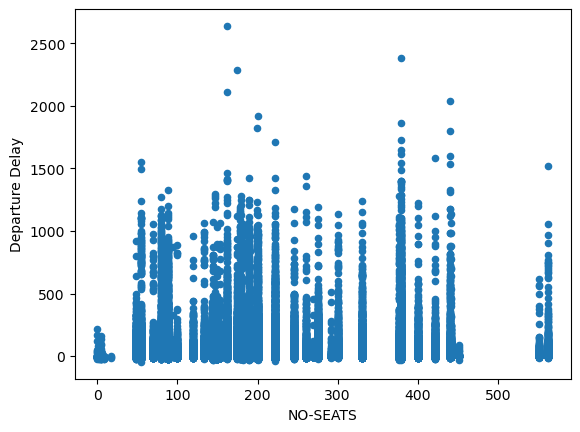

In [1362]:
# Graph number of seats vs departure delay to see if there's a linear relationship. If not, bin the seats.
delays_df.plot('NO-SEATS', 'Departure Delay',kind='scatter')

In [1363]:
# find statistics for number of seats
num_seats_stats = delays_df['NO-SEATS'].describe()
num_seats_stats

count    854863.000000
mean        187.477770
std          97.523195
min           0.000000
25%          88.000000
50%         178.000000
75%         222.000000
max         563.000000
Name: NO-SEATS, dtype: float64

In [1364]:
# Create bins for number of seats. Use mean +/- 1 std dev
bin_seats = False

if bin_seats:
    seat_bins = [0,
                round(num_seats_stats['mean'] - num_seats_stats['std'],0).astype('int64'),
                round(num_seats_stats['mean'] + num_seats_stats['std'],0).astype('int64'),
                num_seats_stats['max'].astype('int64')+1]
    seat_labels = [f'{seat_bins[0]}-{seat_bins[1]}',
                f'{seat_bins[1]+1}-{seat_bins[2]}',
                f'{seat_bins[2]+1}-{seat_bins[3]}'
    ]
    print(seat_bins)
    print(seat_labels)

    delays_df['Number of Seats'] = pd.cut(delays_df['NO-SEATS'], bins=seat_bins, labels=seat_labels)
    delays_df = delays_df.drop('NO-SEATS', axis=1)
    delays_df['Number of Seats'].value_counts().sort_index()
else:
    delays_df = delays_df.rename({'NO-SEATS': 'Number of Seats'}, axis=1)
    delays_df['Number of Seats'] = delays_df['Number of Seats'].astype('Int64')    
    print(delays_df['Number of Seats'].value_counts().sort_index())

Number of Seats
0          31
1          27
2          37
4         143
5           7
6           6
8           8
10          1
17          3
48      21758
55      14292
70       3300
80      26865
88     162022
95         12
100       793
120      3461
133      2759
143     62127
145     13707
147       293
149     40902
151       335
153      2011
162     17604
175     47623
178     26192
179      8513
181        43
182     11872
189     18617
190     22528
191     24765
199     33775
200     38282
222     85372
246     18704
260      2255
269       172
275     16168
292       129
300      3341
330     12725
377      6544
379     86685
400      6619
422      3939
440      3044
442      1791
451        36
552       564
563      2061
Name: count, dtype: Int64


# Create bins for delay time

In [1365]:
delay_times = delays_df['Departure Delay'].describe()
delay_times

count    894689.000000
mean          8.781474
std          46.105858
min         -49.000000
25%          -6.000000
50%          -2.000000
75%           5.000000
max        2640.000000
Name: Departure Delay, dtype: float64

In [1366]:
# At least half of all "delays" are early (negative time at median), so look only at positive times
positive_delay_times = delays_df[delays_df['Departure Delay'] > 0]['Departure Delay'].describe()
positive_delay_times

count    296127.000000
mean         35.962091
std          72.777491
min           1.000000
25%           5.000000
50%          14.000000
75%          38.000000
max        2640.000000
Name: Departure Delay, dtype: float64

In [1367]:
# Breakdown of the last quartile
extreme_delay_times = delays_df[delays_df['Departure Delay'] > positive_delay_times['75%']]['Departure Delay'].describe()
extreme_delay_times

count    73698.000000
mean       108.211335
std        118.453930
min         39.000000
25%         52.000000
50%         73.000000
75%        117.000000
max       2640.000000
Name: Departure Delay, dtype: float64

In [1368]:
# delay_time_bins = [delay_times['min'].astype('int64'),
#                    0,
#                    1,
#                    positive_delay_times['25%'].astype('int64'),
#                    positive_delay_times['50%'].astype('int64'),
#                    positive_delay_times['75%'].astype('int64'),
#                    positive_delay_times['max'].astype('int64')+1]
delay_time_bins = [delay_times['min'].astype('int64'), 0, 1, 11, 31, 61, delay_times['max'].astype('int64')+1]
delay_time_labels = ['Early', 'On Time',
                     f'{delay_time_bins[2]}-{delay_time_bins[3]-1} min',
                     f'{delay_time_bins[3]}-{delay_time_bins[4]-1} min',
                     f'{delay_time_bins[4]}-{delay_time_bins[5]-1} min',
                     f'{delay_time_bins[5]}+ min']

print(delay_time_bins)
print(delay_time_labels)

delays_df['Delay Bin'] = pd.cut(delays_df['Departure Delay'], bins=delay_time_bins, labels=delay_time_labels, right=False)
# delays_df = delays_df.drop('Departure Delay', axis=1)
delays_df['Delay Bin'].value_counts().sort_index()

[-49, 0, 1, 11, 31, 61, 2641]
['Early', 'On Time', '1-10 min', '11-30 min', '31-60 min', '61+ min']


Delay Bin
Early        537916
On Time       60646
1-10 min     123227
11-30 min     82913
31-60 min     43708
61+ min       46279
Name: count, dtype: int64

# Reformat column values for readability

In [1369]:
# Reformat column values
delays_df['TYPE ENGINE'] = delays_df['TYPE ENGINE'].replace({'5': 'Turbo-Fan',
                                                             '4': 'Turbo-Jet' })

delays_df['BUILD-CERT-IND'] = delays_df['BUILD-CERT-IND'].replace({0: True,
                                                                   1: False})

delays_df['BUILD-CERT-IND'].value_counts()


BUILD-CERT-IND
True     805357
False     49506
Name: count, dtype: int64

In [1370]:
delays_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time',
       'Actual Elapsed Time', 'Departure Delay', 'CODE', 'ENG MFR MDL',
       'YEAR MFR', 'LAST ACTION DATE', 'CERT ISSUE DATE', 'TYPE ENGINE',
       'AIR WORTH DATE', 'EXPIRATION DATE', 'MFR', 'MODEL', 'BUILD-CERT-IND',
       'Number of Seats', 'Delay Bin'],
      dtype='object')

# Reformat column names for readability

In [1371]:
# Reformat column names
delays_df = delays_df.rename(columns={
    'CODE': 'Manufacturer Code',
    'ENG MFR MDL': 'Engine Manufacturer Code',
    'YEAR MFR': 'Year of Manufacture',
    'LAST ACTION DATE': 'Certificate Last Activity Date',    
    'CERT ISSUE DATE': 'Certificate Issue Date',
    'TYPE ENGINE': 'Type of Engine',
    'AIR WORTH DATE': 'Air Worthiness Date',
    'EXPIRATION DATE': 'Certificate Expiration Date',
    'MFR': 'Manufacturer',
    'MODEL': 'Model',
    'BUILD-CERT-IND': 'Builder Type Certificated'
})
delays_df.columns

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time',
       'Actual Elapsed Time', 'Departure Delay', 'Manufacturer Code',
       'Engine Manufacturer Code', 'Year of Manufacture',
       'Certificate Last Activity Date', 'Certificate Issue Date',
       'Type of Engine', 'Air Worthiness Date', 'Certificate Expiration Date',
       'Manufacturer', 'Model', 'Builder Type Certificated', 'Number of Seats',
       'Delay Bin'],
      dtype='object')

In [1372]:
delays_df.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time,Actual Elapsed Time,Departure Delay,...,Certificate Last Activity Date,Certificate Issue Date,Type of Engine,Air Worthiness Date,Certificate Expiration Date,Manufacturer,Model,Builder Type Certificated,Number of Seats,Delay Bin
0,AA,01/01/2020,2,N113AN,JFK,08:00,08:01,319,319,1,...,20231013,20140327,Turbo-Fan,20140328,20300331,AIRBUS,A321-231,True,379,1-10 min
1,AA,01/01/2020,4,N110AN,JFK,11:00,12:22,325,314,82,...,20231007,20140226,Turbo-Fan,20140227,20300228,AIRBUS,A321-231,True,379,61+ min
2,AA,01/01/2020,10,N116AN,JFK,21:30,21:26,317,332,-4,...,20240920,20240920,Turbo-Fan,20140523,20310930,AIRBUS,A321-231,True,379,Early
3,AA,01/01/2020,18,N132AN,ORD,19:30,21:14,240,227,104,...,20240206,20150224,Turbo-Fan,20150225,20280229,AIRBUS,A321-231,True,379,61+ min
4,AA,01/01/2020,28,N107NN,JFK,23:00,23:27,316,314,27,...,20240119,20240119,Turbo-Fan,20140125,20310131,AIRBUS,A321-231,True,379,11-30 min


# Date and Time columns

In [1373]:
# Year, Month, Day, Day of Week, Holiday (bool)

delays_df['Year'] = pd.to_datetime(delays_df['Date']).map(lambda x: x.year)
delays_df['Month'] = pd.to_datetime(delays_df['Date']).map(lambda x: x.month)
delays_df['Day'] = pd.to_datetime(delays_df['Date']).map(lambda x: x.day)
delays_df['Day of Week'] = pd.to_datetime(delays_df['Date']).map(lambda x: x.day_of_week)
delays_df['Scheduled Departure Hour'] = pd.to_datetime(delays_df['Scheduled Departure Time'], format='%H:%M').map(lambda x: x.hour)
delays_df['Certificate Last Activity Date'] = pd.to_datetime(delays_df['Certificate Last Activity Date'])
delays_df['Certificate Issue Date'] = pd.to_datetime(delays_df['Certificate Issue Date'])
delays_df['Air Worthiness Date'] = pd.to_datetime(delays_df['Air Worthiness Date'])
delays_df['Certificate Expiration Date'] = pd.to_datetime(delays_df['Certificate Expiration Date'])

# delays_df['Scheduled Departure Hour'].value_counts().sort_index()
delays_df.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time,Actual Elapsed Time,Departure Delay,...,Manufacturer,Model,Builder Type Certificated,Number of Seats,Delay Bin,Year,Month,Day,Day of Week,Scheduled Departure Hour
0,AA,01/01/2020,2,N113AN,JFK,08:00,08:01,319,319,1,...,AIRBUS,A321-231,True,379,1-10 min,2020,1,1,2,8
1,AA,01/01/2020,4,N110AN,JFK,11:00,12:22,325,314,82,...,AIRBUS,A321-231,True,379,61+ min,2020,1,1,2,11
2,AA,01/01/2020,10,N116AN,JFK,21:30,21:26,317,332,-4,...,AIRBUS,A321-231,True,379,Early,2020,1,1,2,21
3,AA,01/01/2020,18,N132AN,ORD,19:30,21:14,240,227,104,...,AIRBUS,A321-231,True,379,61+ min,2020,1,1,2,19
4,AA,01/01/2020,28,N107NN,JFK,23:00,23:27,316,314,27,...,AIRBUS,A321-231,True,379,11-30 min,2020,1,1,2,23


# Reorder columns

In [1374]:
print(f'Number of columns (before):  {len(delays_df.columns)}')
delays_df = delays_df[['Delay Bin', 'Departure Delay', 'Date', 'Year', 'Month', 'Day', 'Day of Week',
                       'Scheduled Departure Hour', 'Scheduled Departure Time', 'Actual Departure Time', 'Scheduled Elapsed Time', 'Actual Elapsed Time',
                       'Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',                       
                       'Manufacturer Code', 'Manufacturer', 'Model', 'Engine Manufacturer Code', 'Year of Manufacture', 'Type of Engine', 'Number of Seats',
                       'Certificate Last Activity Date', 'Certificate Issue Date', 'Air Worthiness Date', 'Certificate Expiration Date', 'Builder Type Certificated']]
# Ensure we have the same number of columns, just reordered
print(f'Number of columns (after):  {len(delays_df.columns)}')

Number of columns (before):  28
Number of columns (after):  28


In [1375]:
# Output the full dataset
write_csv(delays_df, '../Output/flight_delays.csv')

Writing to "../Output/flight_delays.csv"


In [1376]:
delays_df.columns

Index(['Delay Bin', 'Departure Delay', 'Date', 'Year', 'Month', 'Day',
       'Day of Week', 'Scheduled Departure Hour', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time',
       'Actual Elapsed Time', 'Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Manufacturer Code', 'Manufacturer', 'Model',
       'Engine Manufacturer Code', 'Year of Manufacture', 'Type of Engine',
       'Number of Seats', 'Certificate Last Activity Date',
       'Certificate Issue Date', 'Air Worthiness Date',
       'Certificate Expiration Date', 'Builder Type Certificated'],
      dtype='object')

In [1377]:
# For modeling:
# Drop Date in favor of Year, Month, Day columns
# Drop unique identifiers: Flight Number, Tail Number
# Drop Scheduled Departure Hour as it is redundant with Scheduled Departure Time and will be used for other features
# Drop redundant columns: CODE, ENG MFR MDL
# Drop actual times because they occur at/after departure can't be used for prediction

# NOTE: Only use 1 of Delay Bin or Departure Delay for the model target. Drop the other.

model_df = delays_df.drop(['Date', 'Flight Number', 'Tail Number',
                           'Scheduled Departure Hour',
                           'Manufacturer Code', 'Engine Manufacturer Code',
                           'Actual Departure Time', 'Actual Elapsed Time'], axis=1)
print(model_df.columns)
print(f'Number of columns:  {len(model_df.columns)}')

Index(['Delay Bin', 'Departure Delay', 'Year', 'Month', 'Day', 'Day of Week',
       'Scheduled Departure Time', 'Scheduled Elapsed Time', 'Carrier Code',
       'Destination Airport', 'Manufacturer', 'Model', 'Year of Manufacture',
       'Type of Engine', 'Number of Seats', 'Certificate Last Activity Date',
       'Certificate Issue Date', 'Air Worthiness Date',
       'Certificate Expiration Date', 'Builder Type Certificated'],
      dtype='object')
Number of columns:  20


In [1378]:
# Output the modeling dataset
write_csv(model_df, "../Output/modeling_data.csv")

Writing to "../Output/modeling_data.csv"
